### Student Information
Name: 徐子桓

Student ID: 110062590

GitHub ID: ricky42613

Kaggle name: ricky

Kaggle private scoreboard snapshot: 

[Snapshot](img/kaggle.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

# Take Home part

In [2]:
### load training data
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### Exercise 1:  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [6]:
# for training dataset
pd.Series(' '.join(train_df.text).split()).value_counts()[:30]

the     1585
to      1273
a       1145
I       1042
and      912
of       778
is       757
in       588
you      567
my       453
for      431
that     419
on       362
it       359
be       340
me       304
have     290
so       279
this     275
with     272
not      263
at       249
but      242
just     238
I'm      238
was      219
like     216
are      213
your     209
all      198
dtype: int64

In [7]:
# for test dataset
pd.Series(' '.join(test_df.text).split()).value_counts()[:30]

the     138
to      135
I       118
a       103
and      89
of       80
is       72
in       65
you      59
for      53
my       48
it       45
on       42
that     39
be       37
was      32
with     29
have     28
at       27
get      25
are      24
your     24
all      24
so       24
just     23
like     22
i        22
me       22
will     22
but      21
dtype: int64

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [10]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [11]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [12]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [13]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [15]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [16]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [17]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/home/ricky/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [18]:
train_data_BOW_features_500.toarray()

array([[ 0,  5,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 2,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 12,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [19]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['cheerfully',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country',
 'cry',
 'customer',
 'damn']

In [20]:
"😂" in feature_names_500

True

---
### Exercise 2:  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [21]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

tfidf.fit(train_df['text'])

feature_names = tfidf.get_feature_names()
feature_names[100:110]

/home/ricky/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [23]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'joy', 'sadness', 'fear', 'joy', 'sadness', 'joy', 'anger',
       'anger', 'anger'], dtype=object)

---
## 4. Results Evaluation

In [24]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.64


In [25]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [26]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]


In [28]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

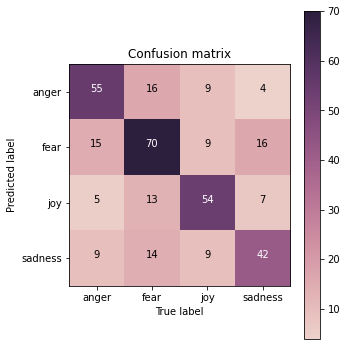

In [29]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### Exercise 3: 
Can you interpret the results above? What do they mean?

the result is overfitting because the training result has high accuracy but the test result has low accuracy.
<br>
The picture show that it can be predicted correctly in most cases, and can clearly see which labels are confuse our model

---
### Exercise 4: 
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

NB = MultinomialNB() # build model
NB = NB.fit(X_train, y_train) # training

y_train_pred = NB.predict(X_train) # predict training data
y_test_pred = NB.predict(X_test) # predict test data

# accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.79
testing accuracy: 0.72


In [31]:
from sklearn.metrics import classification_report
# precision, recall, f1-score
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



In [32]:
# check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


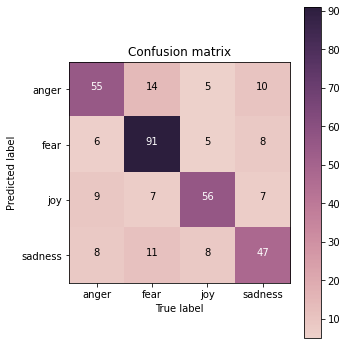

In [33]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### Exercise 5:

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

The Naive Bayes model is better because its test accuracy is better. Although the training accuracy is lower than Dicision Tree model, we care more about the test accuracy, because the test data is what the model has never seen before
<br>
The Naive Bayes model is better in f1-score too.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

### 6.1 Prepare data (X, y)

In [34]:
import keras
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [35]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2026        joy
3324    sadness
1087       fear
3590    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [36]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [37]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                

### 6.4 Train

In [39]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 2s 18ms/step - loss: 1.3212 - accuracy: 0.3695 - val_loss: 1.2532 - val_accuracy: 0.4870
Epoch 2/25
113/113 [==============================] - 2s 16ms/step - loss: 0.9631 - accuracy: 0.6585 - val_loss: 0.9001 - val_accuracy: 0.6513
Epoch 3/25
113/113 [==============================] - 2s 16ms/step - loss: 0.5664 - accuracy: 0.7966 - val_loss: 0.7470 - val_accuracy: 0.7147
Epoch 4/25
113/113 [==============================] - 2s 16ms/step - loss: 0.4121 - accuracy: 0.8433 - val_loss: 0.7752 - val_accuracy: 0.7003
Epoch 5/25
113/113 [==============================] - 2s 17ms/step - loss: 0.3268 - accuracy: 0.8804 - val_loss: 0.7880 - val_accuracy: 0.7147
Epoch 6/25
113/113 [==============================] - 2s 17ms/step - loss: 0.2683 - accuracy: 0.9067 - val_loss: 0.8606 - val_accuracy: 0.7061
Epoch 7/25
113/113 [==============================] - 2s 16ms/step - loss: 0.2254 - accuracy: 0.9217 - val_loss: 0.9123 - val_accuracy: 0.6945

---
### Exercise 6: 

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [40]:
# predict test data
from sklearn.metrics import accuracy_score
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [41]:
# load training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")


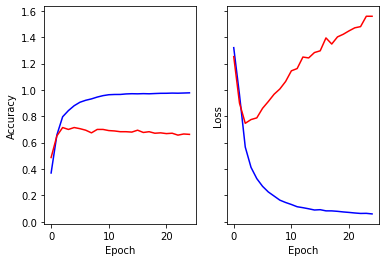

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(training_log['epoch'], training_log['accuracy'], color='blue')
ax1.plot(training_log['epoch'], training_log['val_accuracy'], color='red')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
# plt.savefig('./output/fig-adaboost-acc.png', dpi=300)
# ax2.subplot(1, 2, 2)
ax2.plot(training_log['epoch'], training_log['loss'], color='blue')
ax2.plot(training_log['epoch'], training_log['val_loss'], color='red')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
# plt.tight_layout()
plt.show()

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [43]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2026,30022,"now that I have my future planned out, I feel ...","[now, that, I, have, my, future, planned, out,..."
3324,40497,Sometimes people leave you halfway through the...,"[Sometimes, people, leave, you, halfway, throu..."
1087,20230,@MrMalky @kwr66 How awful! Switched off!,"[@, MrMalky, @, kwr66, How, awful, !, Switched..."
3590,40763,@urbaneprofessor roast them. Then risotto with...,"[@, urbaneprofessor, roast, them, ., Then, ris..."
1183,20326,How can America be so openly embracing racism.,"[How, can, America, be, so, openly, embracing,..."


In [44]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['now', 'that', 'I', 'have', 'my', 'future', 'planned', 'out', ',', 'I', 'feel', 'so', 'much', 'happier', '#', 'goals', '#', 'life', '#', 'happy', '#', 'igotthis', '#', 'yay']),
       list(['Sometimes', 'people', 'leave', 'you', 'halfway', 'through', 'the', 'wood', '.', 'Do', 'not', 'let', 'it', 'grieve', 'you', ',', 'no', 'one', 'leaves', 'for', 'good', '.', '#', 'youarenotalone', '#', 'nooneisalone']),
       list(['@', 'MrMalky', '@', 'kwr66', 'How', 'awful', '!', 'Switched', 'off', '!'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [45]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2026,30022,"now that I have my future planned out, I feel ...","[now, that, I, have, my, future, planned, out,..."
3324,40497,Sometimes people leave you halfway through the...,"[Sometimes, people, leave, you, halfway, throu..."
1087,20230,@MrMalky @kwr66 How awful! Switched off!,"[@, MrMalky, @, kwr66, How, awful, !, Switched..."
3590,40763,@urbaneprofessor roast them. Then risotto with...,"[@, urbaneprofessor, roast, them, ., Then, ris..."
1183,20326,How can America be so openly embracing racism.,"[How, can, America, be, so, openly, embracing,..."


In [48]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [49]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 1.0088714 ,  0.07660908, -0.5418617 , -0.8012087 ,  0.3440075 ,
        0.74999285,  0.51677954, -0.6940061 ,  0.09647334,  0.38282928,
       -0.05996061, -0.41075104,  0.13097526,  0.03546763,  0.6803258 ,
        0.70475364, -0.48811933,  0.6015763 , -0.72416055, -0.320765  ,
        0.04189117, -0.5685426 ,  0.05912346,  1.2220184 ,  0.48541424,
       -0.1834299 ,  0.35583726, -0.5306252 ,  0.15266833,  0.0438188 ,
        0.08443531, -0.89308727, -0.38680986, -0.42422032,  1.0255259 ,
       -0.88919795,  0.39803937, -0.38076916,  0.49523842, -0.03429817,
       -0.09940254,  0.01614331,  0.18201782,  0.17811555,  0.4096342 ,
       -1.2774614 , -0.06236523,  0.25105497, -0.1330444 , -0.08371821,
       -0.8958424 , -0.52058977,  0.08443981, -0.03571884,  0.60320103,
       -0.6682368 , -0.43676263, -0.1564608 , -0.52828854, -0.8851642 ,
       -0.36640942, -0.09493008,  0.36039335, -0.09202747, -0.6100133 ,
       -0.41660446, -0.404238  ,  0.11852295,  0.00490382, -0.62

In [50]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Makes', 0.9483761787414551),
 ('cats', 0.9398908019065857),
 ('blessed', 0.9396394491195679),
 ('O', 0.9319144487380981),
 ('A4', 0.9306702017784119),
 ('bday', 0.9292935729026794),
 ('pls', 0.9253101348876953),
 ('future', 0.924347996711731),
 ('birthday', 0.9238563179969788),
 ("'you", 0.9228703379631042)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [52]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [53]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [54]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

---
### Exercise 7:

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [55]:
word2vec_model.wv[training_corpus[0]]

array([[ 0.98189956,  0.16454957, -0.7579527 , ...,  0.767011  ,
        -0.16858353, -0.2986472 ],
       [ 1.3975706 , -0.3080049 , -0.13101022, ...,  1.1635467 ,
        -0.30151683,  0.31069705],
       [ 0.2173966 , -0.4602387 , -0.4548986 , ...,  1.5866042 ,
        -0.14210986, -0.90001696],
       ...,
       [ 0.03435626, -0.01582795, -0.01308065, ...,  0.01253258,
        -0.05699035,  0.04843661],
       [ 1.3096073 ,  0.03399588, -0.39470848, ...,  0.03146625,
        -2.6097503 ,  2.072569  ],
       [ 0.04856088, -0.04887539, -0.00690193, ...,  0.05549415,
        -0.08887902,  0.07021904]], dtype=float32)

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [56]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [57]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


In [58]:
# check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [59]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

### 9.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [60]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

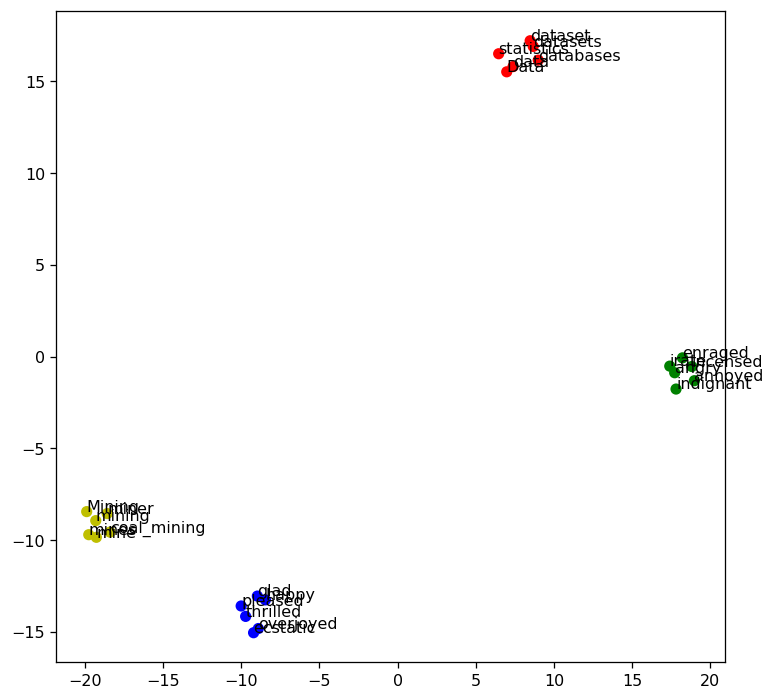

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
# model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(w2v_google_model.wv.vocab.keys())
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### Exercise 8:

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [63]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

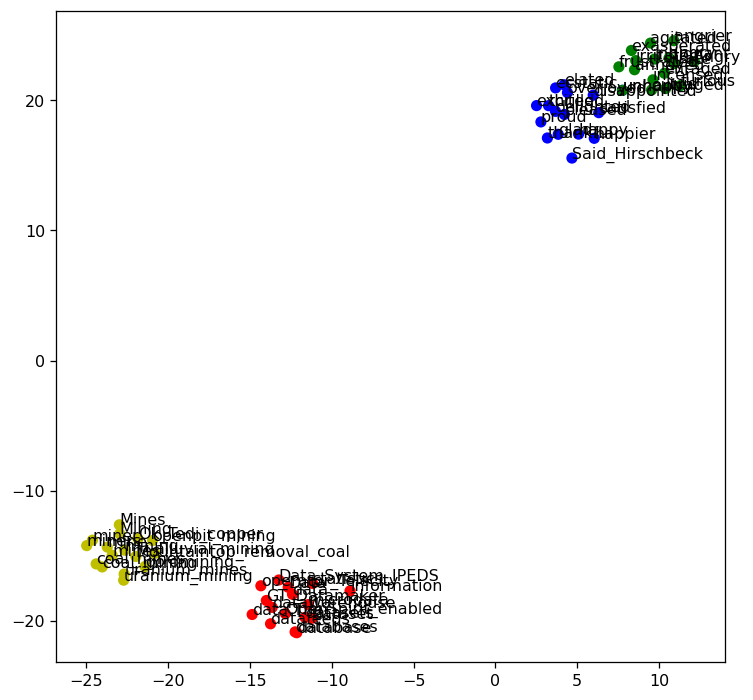

In [65]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(w2v_google_model.wv.vocab.keys())
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Kaggle Report

### Preprocess
* Integrate data_identification.csv, emotion.csv, tweets_DM.json into train.csv and test.csv
* execute command: <code>python transform.py</code>
* For LSTM and Naive Bayes
    * convert all letters to lowercase
    * remove all tag name, ex. "@ricky42613", "@_aisjowq" ..
    * remove all "\<LH>" (I don't know the meaning of \<LH>, but based on observations, it keeps appearing in the dataset)
    * replace all non alphabet character to space
    * replace all continuous space to one space  
* For BERT
    * convert all letters to lowercase
    * replace all continuous space to one space  
    * I try to do the same preprocessing as above, but got terrible results.

### LSTM
* Use 500,000 data for training with 8 epochs: <code>python kaggle/lstmclassifier.py</code>
* for embedding,I use "GoogleNews-vectors-negative300.bin.gz" to do it.
* To view the code in more detail, go to kaggle/lstmclassifier.py
    <pre><code>
    w2v = KeyedVectors.load_word2vec_format(w2vFile,binary = True)
    def to_embedding(tokens): 
        ret = []
        for item in tokens:
            try:
                ret.append(w2v[item])
            except:
                pass
        return ret</code></pre>
* for label, I use one hot encoding. <code>one_hot(first_Y,dtype="int32",depth=8,on_value=1,off_value=0).numpy()</code>
* Predictions for test data: <code>python kaggle/lstm_inference.py</code>
* Public Score: 0.33322
<pre><code>
    inputs = Input(name='inputs',shape=[PADDING_WIDTH,300])
    layer = LSTM(128)(inputs)
    layer = Dense(128,activation="relu",name="FC1")(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(OUTPUT_CATEGORY,activation="softmax",name="FC2")(layer)
    model = Model(inputs=inputs,outputs=layer)
</code></pre>


### Naive Bayes
* Use 1,300,000 data for training: <code>python kaggle/nbclassifier.py</code>
* for CountVectorizer,I set max feature 500 with nltk tokenizer to do it.
* Public Score: 0.32133
* To view the code in more detail, go to kaggle/nbclassifier.py
<pre><code>
    BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
    BOW_500.fit(train_df['text'])

    X_train = BOW_500.transform(train_df['text'])
    y_train = train_df['labels']
    X_test = BOW_500.transform(test_df['text'])
    y_test = test_df['labels']
    X_real_test = BOW_500.transform(real_test_df['text'])
    NB = MultinomialNB() # build model
    NB = NB.fit(X_train, y_train) # training
</code></pre>

### BERT

* use bert-base-uncased pretrained model
    <pre><code>model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=8)</code></pre>
* Use 200,000 data with 5 epochs for finetune: <code>python kaggle/finetune.py</code>
* use AdamW with learning rate 1e-5 as optimizer
    <pre><code>optimizer = AdamW(model.parameters(), lr=1e-5)</code></pre>
* Predictions for test data: <code>python kaggle/inference.py</code>
* Public Score: 0.48468


### Discussion

for LSTM, I think I'm running into underfitting because the accuracy I get at training time and the final test accuracy are both very low, and I think the reason why I running into underfitting is because of Insufficient model complexity. I also tried increasing the number of epochs, but the effect didn't improve, so I don't think the worse result is due to lack of training time.

for BERT, why replacing non-alphabet character with space during preprocessing lead to bad results is because the tokenizer provided by transformers can handle non-alphabet character especially emoji, so when I try to remove non-alphabet character, I lose the important feature of emoji. I guess that's why I get worse results after doing the same preprocessing as LSTM. And I tried fine-tuning with 50,000, 100,000, and 200,000 data, and the accuracy will increase as the number of data increases. But I don't have enough computing resources, so I can only use 200,000 data for fine-tuning. I guess if I can fine-tune Bert with more data, I can get better result.
